In [ ]:
!pip install arch
!pip install statsforecast
!pip install pmdarima

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import missingno as msno
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics
import statsmodels.api as sm


In [ ]:
dfbase = pd.read_excel('/content/base_unificada.xlsx', sheet_name='reduzida')
dfbase.head()

,data,ultimo_valor,valor_abertura,valor_maximo,valor_minimo,volume,variacao,bmp_inv_carteira,bmp_inv_direto,cpi_aucsl,...,crescimento_pib,ke.1,ke_rf_10_y.1,ke_cpi.1,ke_ipca.1,ke_premio_risco.1,ke_risco_pais.1,ke_selic_dia.1,taxa_selic,fator_diario
0,2023-07-21,120.217,118.090,120.373,118.086,11.18,1.81,NaN,NaN,NaN,...,NaN,0.110432,0.0384,0.03127,0.0316,0.05,0.0217,0.1365,NaN,NaN
1,2023-07-20,118.083,117.558,118.290,117.484,8.99,0.45,NaN,NaN,NaN,...,NaN,0.110532,0.0385,0.03127,0.0316,0.05,0.0217,0.1365,NaN,NaN
2,2023-07-19,117.552,117.842,118.011,116.660,9.73,-0.25,NaN,NaN,NaN,...,NaN,0.109832,0.0375,0.03127,0.0316,0.05,0.0220,0.1365,NaN,NaN
3,2023-07-18,117.841,118.218,118.732,117.324,8.58,-0.32,NaN,NaN,NaN,...,NaN,0.110132,0.0380,0.03127,0.0316,0.05,0.0218,0.1365,NaN,NaN
4,2023-07-17,118.219,117.711,118.302,116.591,8.20,0.43,NaN,NaN,NaN,...,NaN,0.110532,0.0381,0.03127,0.0316,0.05,0.0221,0.1365,NaN,NaN


In [ ]:
dfbase.sort_values('data', inplace=True)
dfbase

,data,ultimo_valor,valor_abertura,valor_maximo,valor_minimo,volume,variacao,bmp_inv_carteira,bmp_inv_direto,cpi_aucsl,...,crescimento_pib,ke.1,ke_rf_10_y.1,ke_cpi.1,ke_ipca.1,ke_premio_risco.1,ke_risco_pais.1,ke_selic_dia.1,taxa_selic,fator_diario
2139,2015-01-02,48.512,50.005,50.005,48.345,2.88,-2.99,-11608.826885,4899.248508,234.747,...,0.050991,0.184048,0.0269,-0.003396,0.0641,0.0612,0.0264,0.1165,NaN,NaN
2138,2015-01-05,47.517,48.512,48.512,47.264,3.87,-2.05,-11608.826885,4899.248508,234.747,...,0.050991,0.184787,0.0260,-0.003396,0.0641,0.0612,0.0281,0.1165,NaN,NaN
2137,2015-01-06,48.001,47.517,48.061,47.338,4.56,1.02,-11608.826885,4899.248508,234.747,...,0.050991,0.184533,0.0252,-0.003396,0.0641,0.0612,0.0287,0.1165,NaN,NaN
2136,2015-01-07,49.463,48.006,49.882,48.006,4.41,3.05,-11608.826885,4899.248508,234.747,...,0.050991,0.184233,0.0252,-0.003396,0.0641,0.0612,0.0284,0.1165,NaN,NaN
2135,2015-01-08,49.943,49.463,50.261,49.017,3.62,0.97,-11608.826885,4899.248508,234.747,...,0.050991,0.184380,0.0259,-0.003396,0.0641,0.0612,0.0278,0.1165,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-07-17,118.219,117.711,118.302,116.591,8.20,0.43,NaN,NaN,NaN,...,NaN,0.110532,0.0381,0.031270,0.0316,0.0500,0.0221,0.1365,NaN,NaN
3,2023-07-18,117.841,118.218,118.732,117.324,8.58,-0.32,NaN,NaN,NaN,...,NaN,0.110132,0.0380,0.031270,0.0316,0.0500,0.0218,0.1365,NaN,NaN
2,2023-07-19,117.552,117.842,118.011,116.660,9.73,-0.25,NaN,NaN,NaN,...,NaN,0.109832,0.0375,0.031270,0.0316,0.0500,0.0220,0.1365,NaN,NaN
1,2023-07-20,118.083,117.558,118.290,117.484,8.99,0.45,NaN,NaN,NaN,...,NaN,0.110532,0.0385,0.031270,0.0316,0.0500,0.0217,0.1365,NaN,NaN


In [ ]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 2139 to 0
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data                     2140 non-null   datetime64[ns]
 1   ultimo_valor             2052 non-null   float64       
 2   valor_abertura           2052 non-null   float64       
 3   valor_maximo             2052 non-null   float64       
 4   valor_minimo             2052 non-null   float64       
 5   volume                   2051 non-null   float64       
 6   variacao                 2052 non-null   float64       
 7   bmp_inv_carteira         2018 non-null   float64       
 8   bmp_inv_direto           2018 non-null   float64       
 9   cpi_aucsl                2038 non-null   float64       
 10  cpi_variacao_12m         2038 non-null   float64       
 11  erp_t_bill_rate          1918 non-null   float64       
 12  erp_t_bond_rate          1918 non-

<Axes: >

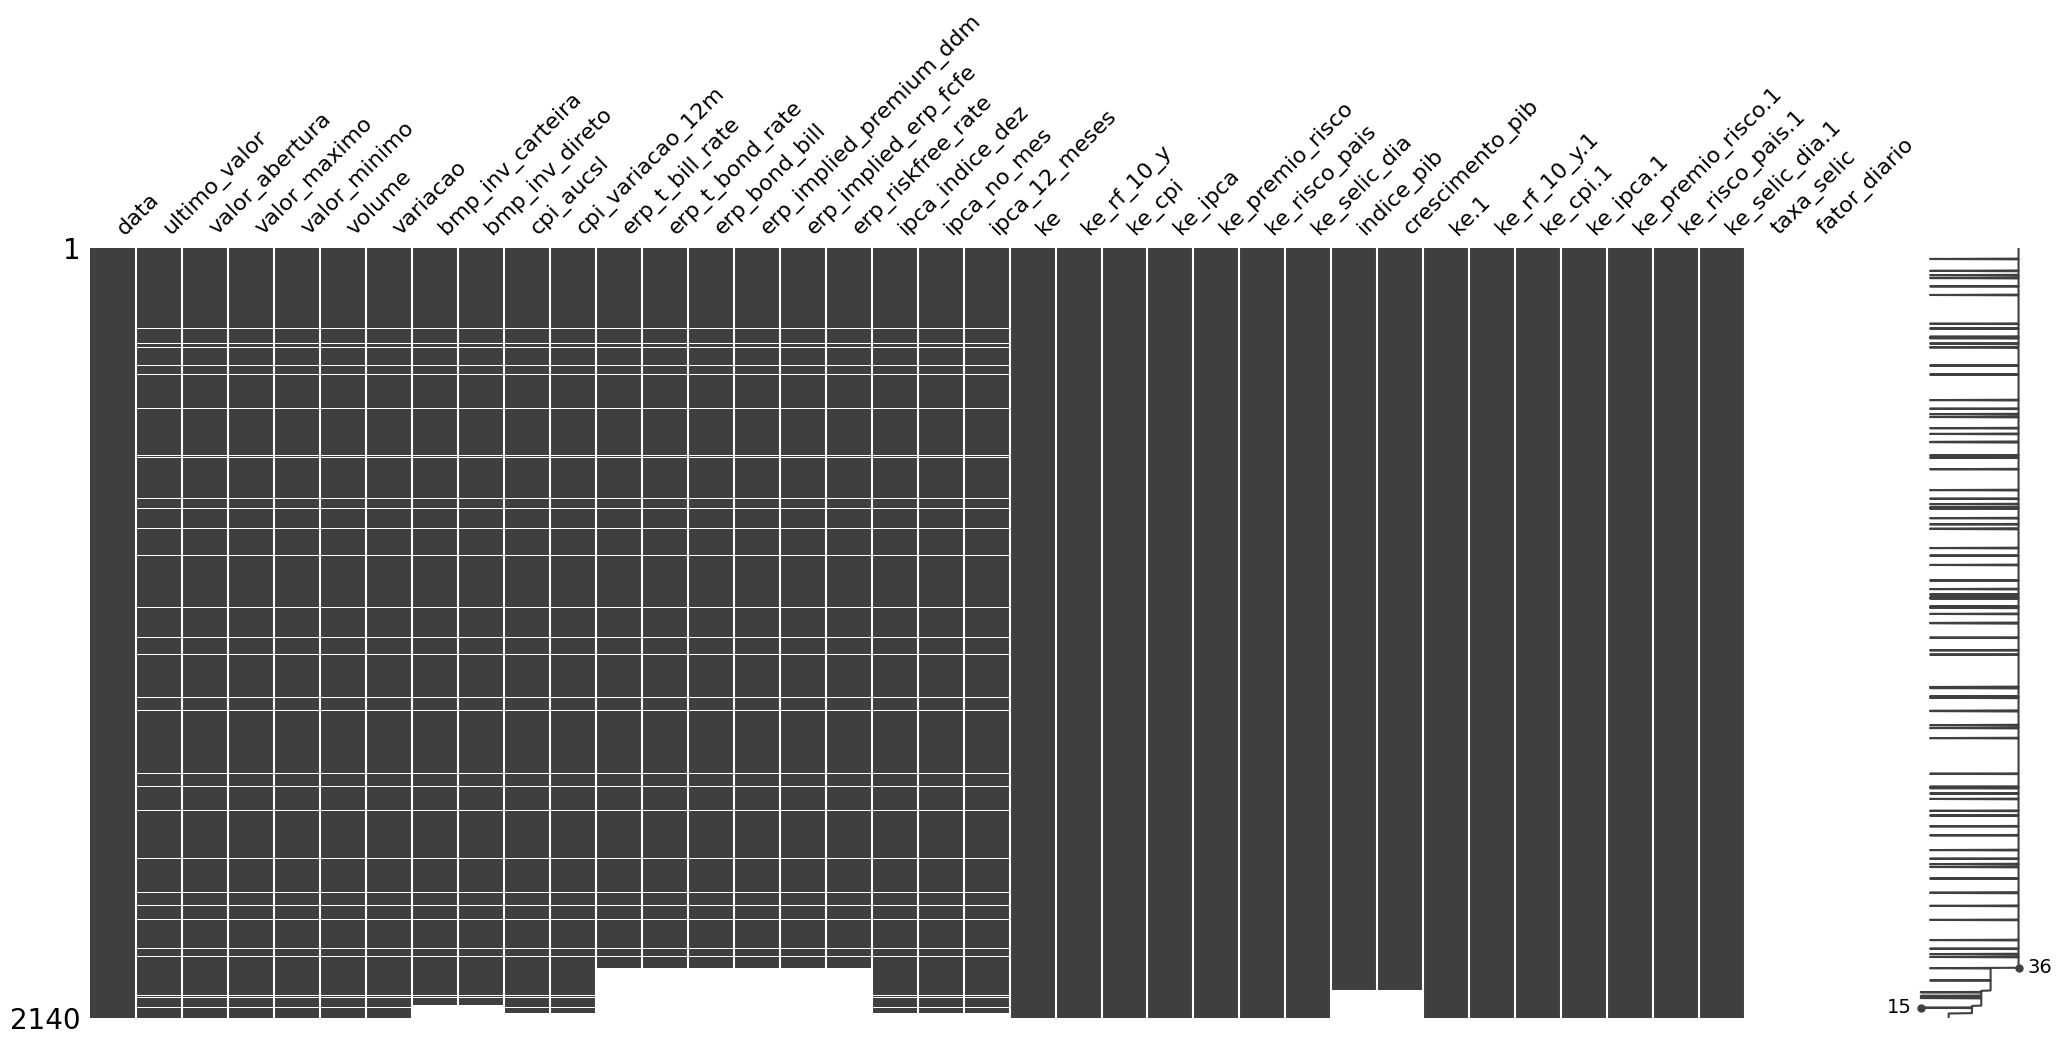

In [ ]:
msno.matrix(dfbase)

In [ ]:
dfbase.shape

(2140, 38)

In [ ]:
dfbase.isnull().sum()

data                          0
ultimo_valor                 88
valor_abertura               88
valor_maximo                 88
valor_minimo                 88
volume                       89
variacao                     88
bmp_inv_carteira            122
bmp_inv_direto              122
cpi_aucsl                   102
cpi_variacao_12m            102
erp_t_bill_rate             222
erp_t_bond_rate             222
erp_bond_bill               222
erp_implied_premium_ddm     222
erp_implied_erp_fcfe        222
erp_riskfree_rate           222
ipca_indice_dez             102
ipca_no_mes                 102
ipca_12_meses               102
ke                            0
ke_rf_10_y                    0
ke_cpi                        0
ke_ipca                       0
ke_premio_risco               0
ke_risco_pais                 0
ke_selic_dia                  0
indice_pib                   77
crescimento_pib              77
ke.1                          0
ke_rf_10_y.1                  0
ke_cpi.1

In [ ]:
dfbase = dfbase.dropna(subset=["volume"])

In [ ]:
dfbase.shape

(2051, 38)

Text(0.5, 1.0, 'Histograma de Ke')

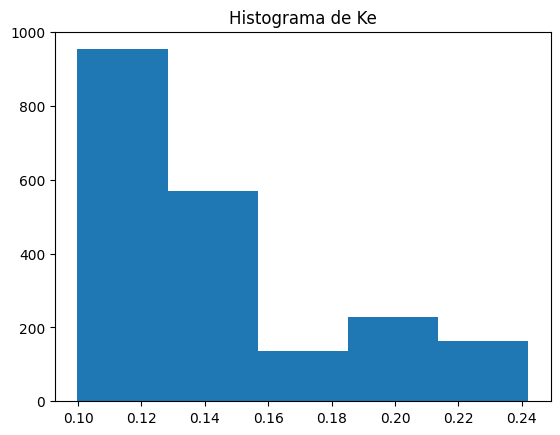

In [ ]:
plt.hist(dfbase["ke"],bins=5)
plt.title("Histograma de Ke")

Text(0.5, 1.0, 'Histograma de selic dia')

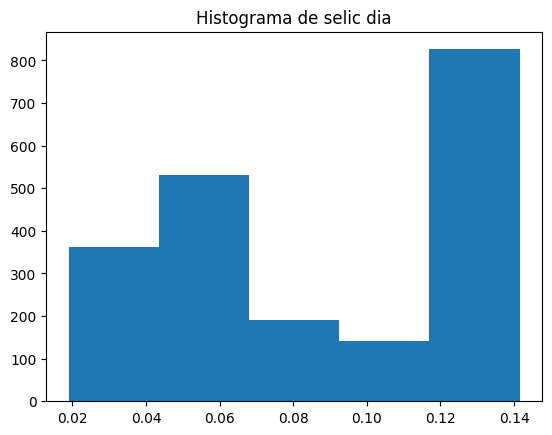

In [ ]:
plt.hist(dfbase["ke_selic_dia"],bins=5)
plt.title("Histograma de selic dia")

Text(0.5, 1.0, 'Histograma de ipca dia')

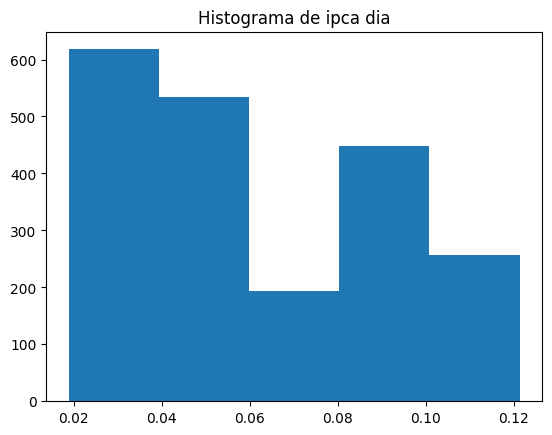

In [ ]:
plt.hist(dfbase["ke_ipca"],bins=5)
plt.title("Histograma de ipca dia")

Text(0.5, 1.0, 'Histograma de investimento direto')

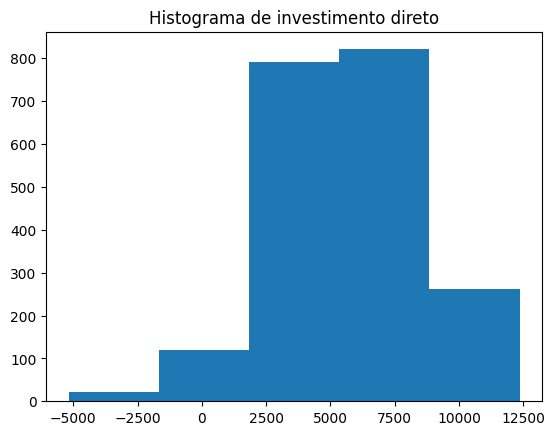

In [ ]:
plt.hist(dfbase["bmp_inv_direto"],bins=5)
plt.title("Histograma de investimento direto")

Text(0.5, 1.0, 'Histograma de Investimentos carteira')

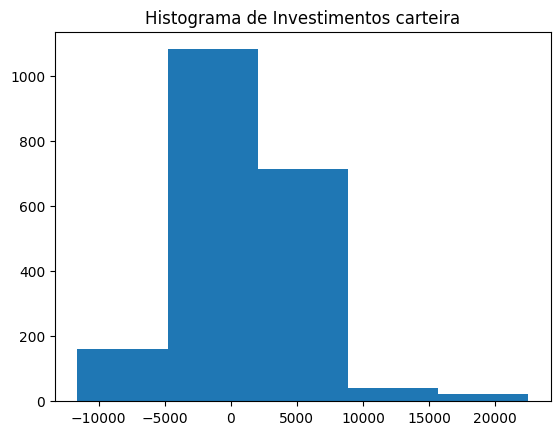

In [ ]:
plt.hist(dfbase["bmp_inv_carteira"],bins=5)
plt.title("Histograma de Investimentos carteira")

In [ ]:
df_corr = dfbase.filter(['ultimo_valor',"ke","bmp_inv_carteira","volume", "bmp_inv_direto", "crescimento_pib","ke_risco_pais","ke_selic_dia"],axis=1)

<Axes: >

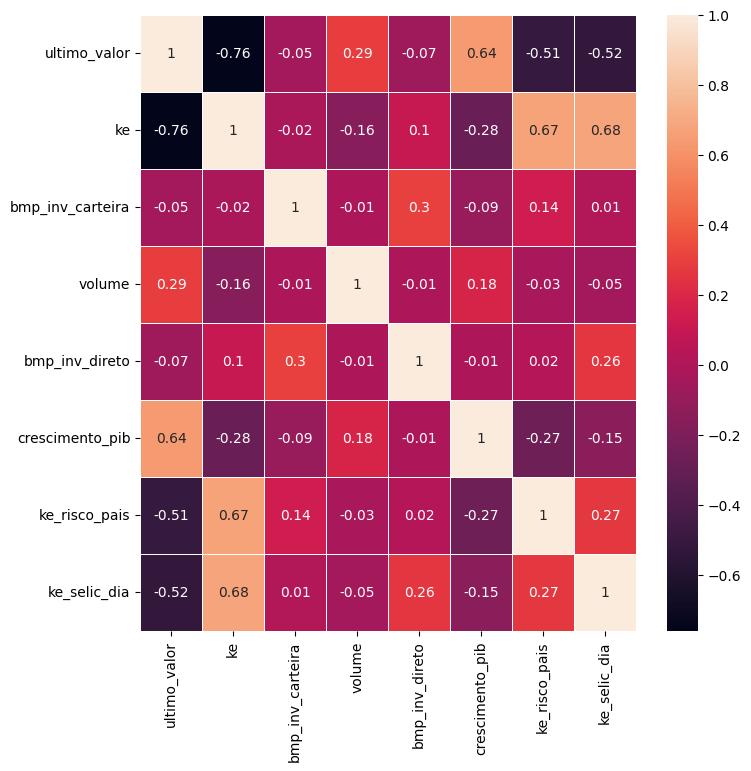

In [ ]:
correlation_matrix = df_corr.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Valor do fechamento vs Ke')

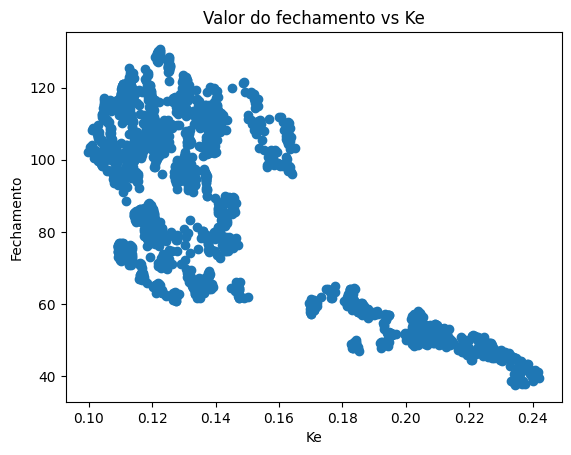

In [ ]:
plt.scatter("ke","ultimo_valor",data = dfbase)
plt.xlabel("Ke")
plt.ylabel("Fechamento")
plt.title("Valor do fechamento vs Ke")

Text(0.5, 1.0, 'Valor do fechamento vs crescimento pib')

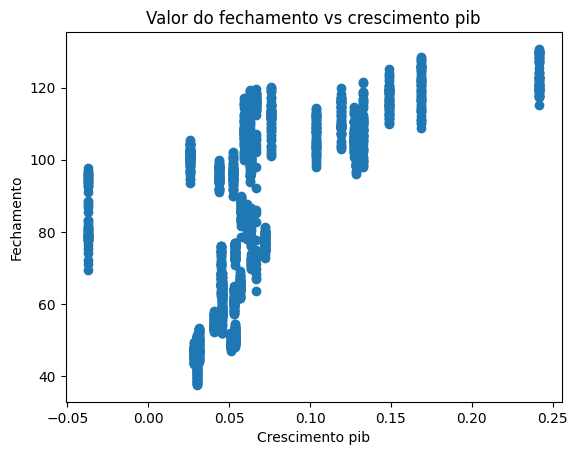

In [ ]:
plt.scatter("crescimento_pib","ultimo_valor",data = dfbase)
plt.xlabel("Crescimento pib")
plt.ylabel("Fechamento")
plt.title("Valor do fechamento vs crescimento pib")

Text(0.5, 1.0, 'Valor do fechamento vs bmp_inv_direto ')

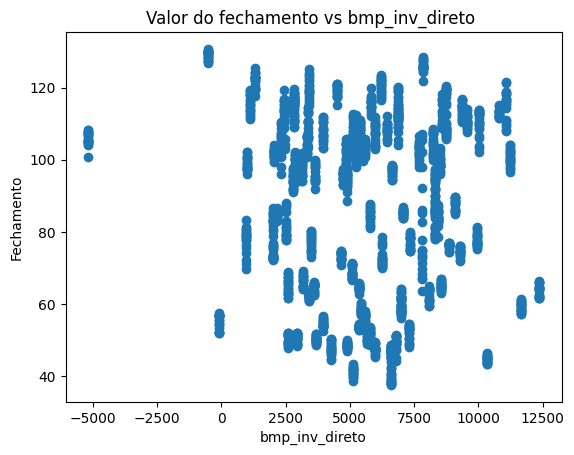

In [ ]:
#bmp_inv_direto
plt.scatter("bmp_inv_direto","ultimo_valor",data = dfbase)
plt.xlabel("bmp_inv_direto")
plt.ylabel("Fechamento")
plt.title("Valor do fechamento vs bmp_inv_direto ")

Text(0.5, 1.0, 'Valor do fechamento vs bmp_inv_carteira')

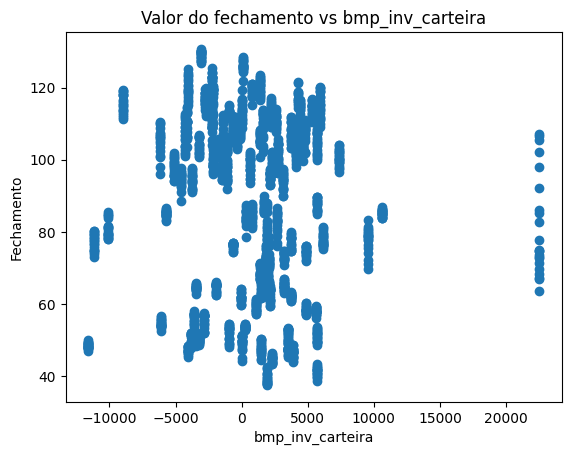

In [ ]:
plt.scatter("bmp_inv_carteira","ultimo_valor",data = dfbase)
plt.xlabel("bmp_inv_carteira")
plt.ylabel("Fechamento")
plt.title("Valor do fechamento vs bmp_inv_carteira")

In [ ]:
dfbase.isnull().sum()

data                          0
ultimo_valor                  0
valor_abertura                0
valor_maximo                  0
valor_minimo                  0
volume                        0
variacao                      0
bmp_inv_carteira             34
bmp_inv_direto               34
cpi_aucsl                    14
cpi_variacao_12m             14
erp_t_bill_rate             134
erp_t_bond_rate             134
erp_bond_bill               134
erp_implied_premium_ddm     134
erp_implied_erp_fcfe        134
erp_riskfree_rate           134
ipca_indice_dez              14
ipca_no_mes                  14
ipca_12_meses                14
ke                            0
ke_rf_10_y                    0
ke_cpi                        0
ke_ipca                       0
ke_premio_risco               0
ke_risco_pais                 0
ke_selic_dia                  0
indice_pib                   73
crescimento_pib              73
ke.1                          0
ke_rf_10_y.1                  0
ke_cpi.1

In [ ]:
dfbasereduzido =dfbase.dropna(subset=["crescimento_pib","bmp_inv_direto"])

#Opção R1

In [ ]:
lr = LinearRegression()

x = dfbasereduzido[["volume","bmp_inv_carteira", "bmp_inv_direto","ke","ke_ipca", "ke_cpi", "crescimento_pib"]]

y= dfbasereduzido[["ultimo_valor"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=101)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,volume,1.348191
1,bmp_inv_carteira,-0.000326
2,bmp_inv_direto,0.000528
3,ke,-837.198381
4,ke_ipca,646.549374
5,ke_cpi,-363.922919
6,crescimento_pib,80.530040


In [ ]:

print('R-Squared: ', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

R-Squared:  -0.4059574792306877
Mean Squared Error:  864.8530247027078
Root Mean Squared Error:  29.408383578542832
Mean Absolute Error:  8.903984915528826


#OLS

In [ ]:
x = dfbasereduzido[["volume","bmp_inv_carteira", "bmp_inv_direto","ke","ke_ipca", "ke_cpi", "crescimento_pib"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1513.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:01:06   Log-Likelihood:                -5720.6
No. Observations:                1582   AIC:                         1.146e+04
Df Residuals:                    1574   BIC:                         1.150e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              158.8190      2.613  

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  864.853024702244
Root Mean Squared Error:  29.40838357853495
Mean Absolute Error:  8.903984915514396


#ols 2

In [ ]:
x = dfbasereduzido[["volume","ke","ke_ipca", "ke_cpi", "crescimento_pib"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2030.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:06:10   Log-Likelihood:                -5750.5
No. Observations:                1582   AIC:                         1.151e+04
Df Residuals:                    1576   BIC:                         1.155e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             155.7343      2.623     

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  832.2568434810383
Root Mean Squared Error:  28.84886208294945
Mean Absolute Error:  8.853587603597084


#OLS 3

In [ ]:
x = dfbasereduzido[["volume","ke", "crescimento_pib"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:07:29   Log-Likelihood:                -5920.3
No. Observations:                1582   AIC:                         1.185e+04
Df Residuals:                    1578   BIC:                         1.187e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             112.5504      1.355     

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  1745.2110710375225
Root Mean Squared Error:  41.775723465160034
Mean Absolute Error:  10.105467313807209


#OLS 4

In [ ]:
x = dfbasereduzido[["volume","ke"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     2318.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:09:12   Log-Likelihood:                -6254.2
No. Observations:                1582   AIC:                         1.251e+04
Df Residuals:                    1579   BIC:                         1.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.4063      1.606     76.822      0.0

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  3576.6752055125758
Root Mean Squared Error:  59.8053108470525
Mean Absolute Error:  12.883566327525669


#OLS 5

In [ ]:
#variacao
x = dfbasereduzido[["volume","ke","variacao"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1544.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:11:26   Log-Likelihood:                -6254.1
No. Observations:                1582   AIC:                         1.252e+04
Df Residuals:                    1578   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.3946      1.607     76.772      0.0

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  3576.583305106454
Root Mean Squared Error:  59.804542512308
Mean Absolute Error:  12.879637465873314


#OLS 6

In [ ]:
x = dfbasereduzido[["volume","ke","ke_ipca", "crescimento_pib", "ke_selic_dia"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2539.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:14:05   Log-Likelihood:                -5595.1
No. Observations:                1582   AIC:                         1.120e+04
Df Residuals:                    1576   BIC:                         1.123e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             137.8698      1.724     

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  585.3880423776461
Root Mean Squared Error:  24.19479370396958
Mean Absolute Error:  7.956246101629869


#OLS 7

In [ ]:
x = dfbasereduzido[["volume","ke","ke_ipca", "crescimento_pib", "ke_selic_dia","bmp_inv_carteira","bmp_inv_direto"]]
y= dfbasereduzido[["ultimo_valor"]]

# Adicionar uma constante ao conjunto de recursos, pois o statsmodels.api.OLS não o faz automaticamente
x = sm.add_constant(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101)

# Fit do modelo
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print do sumário
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           ultimo_valor   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1939.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:24:13   Log-Likelihood:                -5547.1
No. Observations:                1582   AIC:                         1.111e+04
Df Residuals:                    1574   BIC:                         1.115e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              136.3526      1.699  

In [ ]:
y_pred = results.predict(x_test)

# Cálculo do Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Cálculo do Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# Cálculo do Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  578.0199990807396
Root Mean Squared Error:  24.042046482792173
Mean Absolute Error:  7.936240179659425


In [ ]:
dfbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 2139 to 0
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data                     2051 non-null   datetime64[ns]
 1   ultimo_valor             2051 non-null   float64       
 2   valor_abertura           2051 non-null   float64       
 3   valor_maximo             2051 non-null   float64       
 4   valor_minimo             2051 non-null   float64       
 5   volume                   2051 non-null   float64       
 6   variacao                 2051 non-null   float64       
 7   bmp_inv_carteira         2017 non-null   float64       
 8   bmp_inv_direto           2017 non-null   float64       
 9   cpi_aucsl                2037 non-null   float64       
 10  cpi_variacao_12m         2037 non-null   float64       
 11  erp_t_bill_rate          1917 non-null   float64       
 12  erp_t_bond_rate          1917 non-

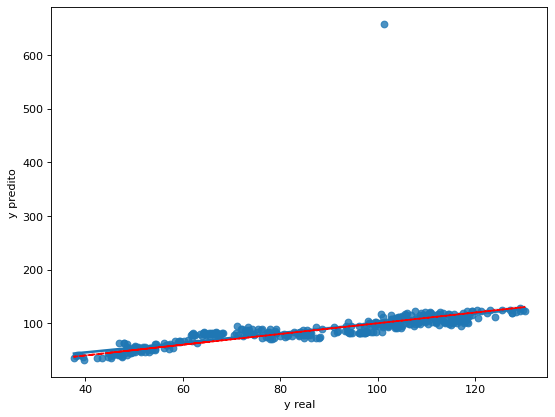

In [ ]:
fig = plt.figure(figsize=(8,6), dpi = 80)
ax = sns.regplot(x=y_test, y = y_pred)
ax.set(xlabel="y real", ylabel ="y predito")
ax = plt.plot(y_test, y_test, '--r')

#ARIMA

In [ ]:
dfarima = dfbase.filter(["data","ultimo_valor"], axis=1)
dfarima =dfarima.rename(columns={"ultimo_valor":'y'})

treino = dfarima.loc[dfarima['data'] < '2022-01-01']
valid = dfarima.loc[(dfarima['data'] >= '2022-01-01') & (dfarima['data'] < '2022-02-01')]

h = valid['data'].nunique()
valid.set_index('data', inplace=True)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#check order ARIMA

step_fit = auto_arima(dfbase['ultimo_valor'], trace = True, suppress_warnings=True)

step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7093.437, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7115.563, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7096.289, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7098.277, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7114.897, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7094.594, Time=1.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7093.018, Time=2.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7096.053, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7094.281, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7091.954, Time=2.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7094.142, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7093.853, Time=2.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7088.996, Time=3.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7093.684, Time=6.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2051
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3538.280
Date:                Sat, 05 Aug 2023   AIC                           7088.560
Time:                        01:55:26   BIC                           7122.313
Sample:                             0   HQIC                          7100.938
                               - 2051                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6797      0.076    -21.992      0.000      -1.829      -1.530
ar.L2         -0.8815      0.089     -9.858      0.000      -1.057      -0.706
ar.L3         -0.0300      0.018     -1.657      0.097      -0.066       0.005
ma.L1          1.5876      0.073     21.752      0.000       1.445       1.731
ma.L2          0.7597      0.073     10.387      0.000       0.616       0.903
sigma2         1.8479      0.025     73.219      0.000       1.798       1.897
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11990.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

df_red_arima = dfbase[['data', 'ultimo_valor']]
df_red_arima
df_red_arima.set_index('data', inplace=True)

treino =df_red_arima.iloc[:-20]
test = df_red_arima.iloc[-20:]
print(treino.shape, test.shape)

(2031, 1) (20, 1)


In [ ]:
model = ARIMA(treino['ultimo_valor'], order=(3,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ultimo_valor   No. Observations:                 2031
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3506.708
Date:                Sat, 05 Aug 2023   AIC                           7025.415
Time:                        01:55:28   BIC                           7059.110
Sample:                             0   HQIC                          7037.778
                               - 2031                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6810      0.075    -22.499      0.000      -1.827      -1.535
ar.L2         -0.8805      0.087    -10.080      0.000      -1.052      -0.709
ar.L3         -0.0283      0.018     -1.581      0.114      -0.063       0.007
ma.L1          1.5905      0.071     22.303      0.000       1.451       1.730
ma.L2          0.7613      0.071     10.678      0.000       0.622       0.901
sigma2         1.8533      0.025     73.072      0.000       1.804       1.903
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11936.90
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                            -1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Prever

start = len(treino)
end = len(treino) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels")
pred.index = df_red_arima.index[start:end+1]
print(pred.shape)
print(len(treino), len(test))

(20,)
2031 20


<Axes: xlabel='data'>

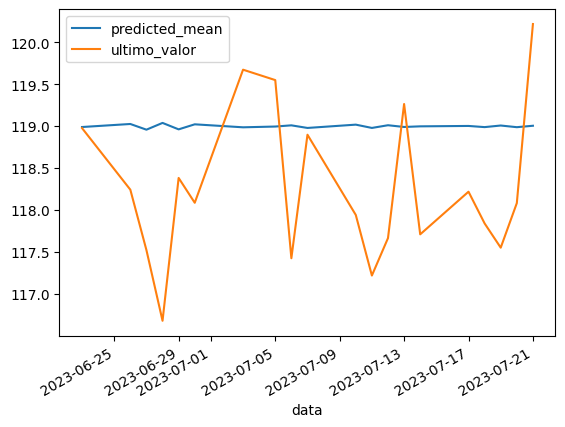

In [ ]:
pred.plot(legend=True)
test['ultimo_valor'].plot(legend=True)

In [ ]:
# Garanta que suas datas estão em ordem crescente
treino = treino.sort_values('data')

# Defina a frequência do índice da data
treino.index = pd.DatetimeIndex(treino.index).to_period('B')

# Ajustando o modelo ARIMA
model = ARIMA(treino['y'], order=(1,1,1))
model_fit = model.fit()

# Realizando a previsão
forecast = model_fit.forecast(steps=h)

print(forecast)



KeyError: ignored

In [ ]:
model = auto_arima(treino['y'], seasonal=True, m=7)

# Realizando a previsão
forecast = model.predict(n_periods=h)

# Crie um dataframe para manter suas previsões
forecast_index = pd.date_range(start='2022-01-01', periods=h, freq='B')
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Prediction'])

# Plot os valores reais
plt.figure(figsize=(10,5))
plt.plot(valid['y'], color='blue', label='Valores Reais')

# Plot as previsões
plt.plot(forecast_df['Prediction'], color='red', label='Previsões')

plt.title('Preço da Ação: Valores Reais vs Previsões')
plt.xlabel('Data')
plt.ylabel('Preço da Ação')
plt.legend()
plt.show()

In [ ]:
print(model.summary())

In [ ]:
# Realizando a previsão
forecast = model_fit.forecast(steps=h)

# Crie um dataframe para manter suas previsões
forecast_index = pd.date_range(start='2022-01-01', periods=h, freq='B')
forecast_df = pd.DataFrame(data=forecast[0], index=forecast_index, columns=['Prediction'])

# Plot os valores reais
plt.figure(figsize=(10,5))
plt.plot(valid['y'], color='blue', label='Valores Reais')

# Plot as previsões
plt.plot(forecast_df['Prediction'], color='red', label='Previsões')

plt.title('Preço da Ação: Valores Reais vs Previsões')
plt.xlabel('Data')
plt.ylabel('Preço da Ação')
plt.legend()
plt.show()


#Decompose

In [ ]:
#df index e y
dfy = dfbase.filter(["data","ultimo_valor"], axis=1)
dfy =dfy.rename(columns={"ultimo_valor":'y'})
dfy = dfy.set_index("data")
dfy

In [ ]:
plt.plot(dfy.index, dfy.y)

In [ ]:
dfy = dfy.asfreq('B').interpolate(method='time')
resultados = seasonal_decompose(dfy)

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [ ]:
X = dfy.y.values
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}. If p-value>0.05, than the series is statitionary")

In [ ]:
ma = dfy.rolling(12).mean()

f, ax = plt.subplots()
dfy.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

In [ ]:
lag_acf = acf(dfy.dropna(), nlags=25)
lag_pacf = pacf(dfy.dropna(), nlags=25)

In [ ]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(dfy) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(dfy) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(dfy) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(dfy) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

In [ ]:
plot_acf(dfy.y)
plot_pacf(dfy.y)
plt.show()

In [ ]:
dfreturns= dfy.copy()
dfreturns["returns"] = dfreturns.y.pct_change(1)*100
#dfreturns["sq_returns"] = dfreturns.returns.mul(dfreturns)

In [ ]:
model_arch_1 = arch_model(dfreturns.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

In [ ]:
#simple arch(1)

model_arch_1 = arch_model(dfreturns.returns[1:], mean='Constant', vol="ARCH", p=1)
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()